# <div style='color:Brown; text-align:center;'>Most dominant colors in an image using KMeans clustering</div>

### Essential Loading Libraries

In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Defining the number of clusters

In [47]:
clusters = 5

### Selecting Image

In [48]:
img_file = "1.jpg"

### Loading and Processing images

In [49]:
img = cv2.imread(img_file)
org_img = img.copy()
print('Org image shape: ',img.shape)

Org image shape:  (1599, 1185, 3)


In [50]:
img = imutils.resize(img,height=200)
print('After resizing shape: ',img.shape)

After resizing shape:  (200, 148, 3)


In [51]:
flat_img = np.reshape(img,(-1,3))
print('After Flattening shape: ',flat_img.shape)

After Flattening shape:  (29600, 3)


### Applying KMean Clustring on Image Data

In [52]:
kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)

KMeans(n_clusters=5, random_state=0)

### Retrieving Dominant Colors & Their Percentage

In [53]:
dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

In [54]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([ 3475,  8238, 11247,  1954,  4686], dtype=int64))

In [55]:
flat_img.shape[0] # total pixels

29600

In [56]:
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]

In [57]:
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

In [58]:
print("Color Code(RGB)\tColor Percent")
for p, c in p_and_c:
    print(f"{c}\t{round(p*100, 3)} %")

Color Code(RGB)	Color Percent
[231 223 217]	37.997 %
[217 195 162]	27.831 %
[176 164 203]	15.831 %
[27 18 14]	11.74 %
[125  98  68]	6.601 %


### Displaying Dominant Colors

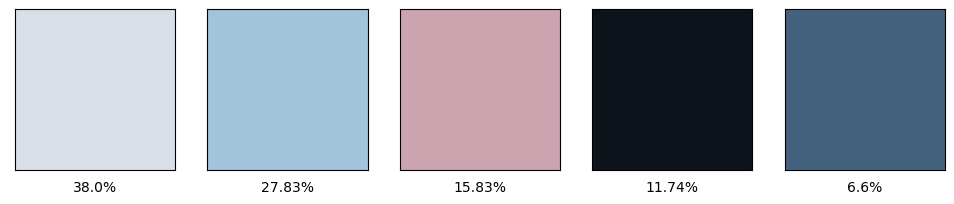

In [59]:
block = np.ones((50,50,3),dtype='uint')

plt.figure(figsize=(12,8))

for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

([], [])

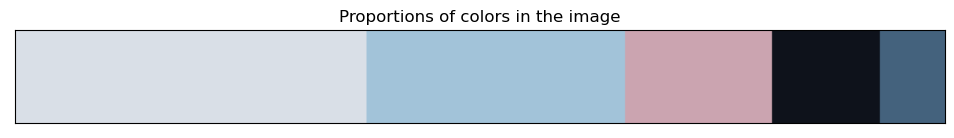

In [60]:
bar = np.ones((50,500,3),dtype='uint')

plt.figure(figsize=(12,8))

plt.title('Proportions of colors in the image')
start = 0
i = 1

for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])

In [61]:
rows = 1000
cols = int((org_img.shape[0]/org_img.shape[1])*rows)

img = cv2.resize(org_img, dsize=(rows,cols), interpolation=cv2.INTER_LINEAR)

In [62]:
# org_img.shape[0] - Represent Height of Orginal Image
# org_img.shape[1] - Represent width of Orginal Image

### Creates a copy of the img & Rectangle

In [63]:
copy = img.copy()
t1 = cv2.rectangle(copy, (rows//2-250,cols//2-90), (rows//2+250,cols//2+110), (255,255,255),-1)

### Adding a text on the image 

In [64]:
final = cv2.addWeighted(img,0.1,copy,0.9,0)
t2 = cv2.putText(
    img = final,
    text = 'Most Dominant Colors in the Image',     
    org = (rows//2-230,cols//2-40), 
    fontFace = cv2.FONT_HERSHEY_DUPLEX,
    fontScale = 0.8,
    color = (0,0,0),
    thickness = 1,
    lineType = cv2.LINE_AA
)

### Display the top 5 dominant colors of the input image on the output image.

In [65]:
start = rows//2-220
for i in range(clusters):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final, str(i+1), (start+25,cols//2+45), cv2.FONT_HERSHEY_DUPLEX,1, (255,255,255), 1, cv2.LINE_AA)
    start = end+20
    
plt.show()

In [66]:
cv2.imshow('img',final)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('output.png', final)

True